In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

# ---
### Cao

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,organ,organism,plate,platform,region
cele-001-001.CATGACTCAA,neuron,CL:0000540,Unclassified neurons,20,Cao,Atlas,Caenorhabditis elegans,001,sci-RNA-seq,Neurons
cele-001-001.AAGACGGCCA,germ line cell,CL:0000039,Germline,6,Cao,Atlas,Caenorhabditis elegans,001,sci-RNA-seq,Gonad
cele-001-001.GCCAACGCCA,visceral muscle cell,CL:0008007,Intestinal/rectal muscle,13,Cao,Atlas,Caenorhabditis elegans,001,sci-RNA-seq,Intestinal/rectal muscle
cele-001-001.CTCGTCTAGG,coelomocyte,CL:0000421,Coelomocytes,2,Cao,Atlas,Caenorhabditis elegans,001,sci-RNA-seq,Coelomocytes
cele-001-001.AAGTTGCCAT,germ line cell,CL:0000039,Germline,6,Cao,Atlas,Caenorhabditis elegans,001,sci-RNA-seq,Gonad


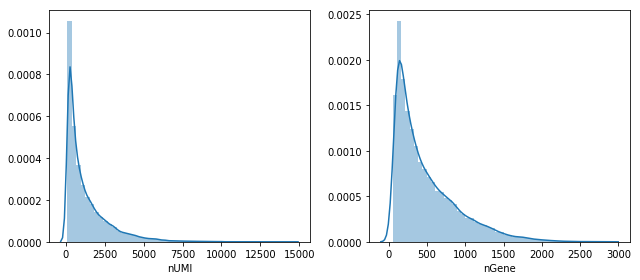

In [2]:
cao = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Cao/data.h5")
utils.peek(cao, "Cao")
cao = cao.normalize()
cao.obs.head()

In [3]:
cao_model = cb.directi.fit_DIRECTi(
    cao, cao.uns["seurat_genes"],
    **fixed_model_kwargs,
    path="/tmp/cb/db/Cao/model_0"
)
cao.latent = cao_model.inference(cao)

[DIRECTi epoch 0] train=1.241, val=0.315, time elapsed=4.3s Best save...
[DIRECTi epoch 1] train=0.200, val=0.189, time elapsed=2.9s Best save...
[DIRECTi epoch 2] train=0.174, val=0.178, time elapsed=2.9s Best save...
[DIRECTi epoch 3] train=0.167, val=0.168, time elapsed=2.8s Best save...
[DIRECTi epoch 4] train=0.164, val=0.165, time elapsed=2.9s Best save...
[DIRECTi epoch 5] train=0.162, val=0.161, time elapsed=2.9s Best save...
[DIRECTi epoch 6] train=0.160, val=0.158, time elapsed=2.9s Best save...
[DIRECTi epoch 7] train=0.157, val=0.156, time elapsed=2.8s Best save...
[DIRECTi epoch 8] train=0.155, val=0.154, time elapsed=2.9s Best save...
[DIRECTi epoch 9] train=0.154, val=0.153, time elapsed=2.8s Best save...
[DIRECTi epoch 10] train=0.152, val=0.151, time elapsed=2.8s Best save...
[DIRECTi epoch 11] train=0.151, val=0.150, time elapsed=2.9s Best save...
[DIRECTi epoch 12] train=0.150, val=0.149, time elapsed=2.8s Best save...
[DIRECTi epoch 13] train=0.149, val=0.148, time 

[  Info   ] Computing tSNE...


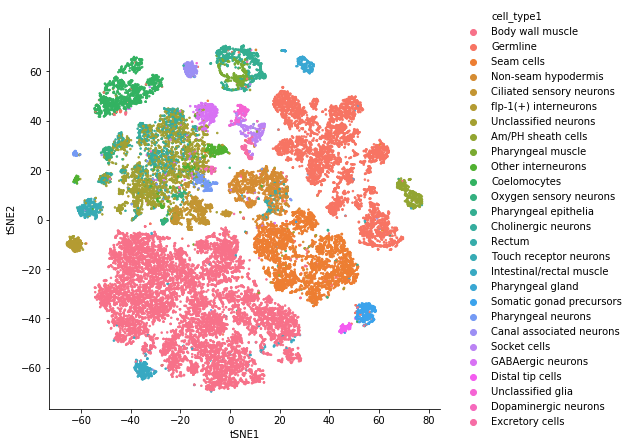

In [4]:
plot = cao.visualize_latent("cell_type1")
plot.get_figure().savefig("Cao/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


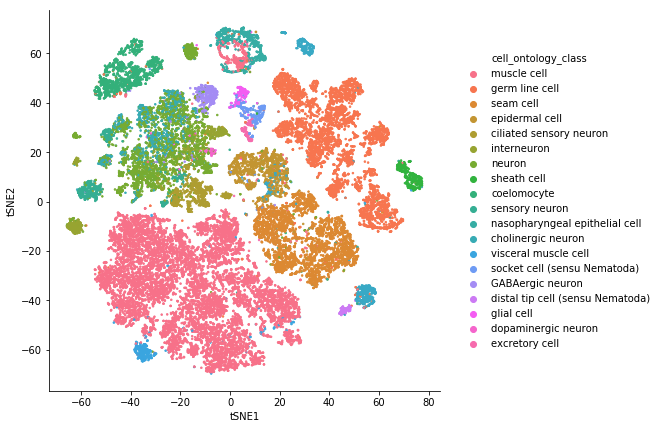

In [5]:
plot = cao.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Cao/cell_ontology_class.pdf", bbox_inches="tight")

In [6]:
%%capture capio
cao_models = [cao_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    cao_models.append(cb.directi.fit_DIRECTi(
        cao, cao.uns["seurat_genes"],
        **fixed_model_kwargs, 
        random_seed=i, path="/tmp/cb/db/Cao/model_%d" % i
    ))
cao_blast = cb.blast.BLAST(cao_models, cao, 
                                               keep_exprs=True).build_empirical()
cao_blast.save("Cao")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Cao/model_1/checkpoint-79
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Cao/model_2/checkpoint-93
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Cao/model_3/checkpoint-54


In [7]:
with open("Cao/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Cao/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [8]:
utils.self_projection(cao_blast, "Cao")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.6547
Accuracy = 0.9893
